# matplotlib practice

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

## 练习1：航班乘客变化分析
* 分析年度乘客总量变化情况（折线图）
* 分析乘客在一年中各月份的分布（柱状图）

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


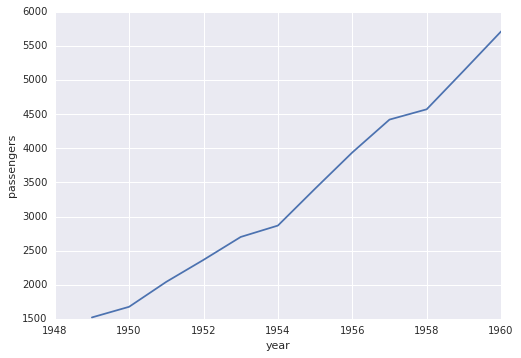

In [3]:
# your code
_, ax = plt.subplots()
every_year = data[['year', 'passengers']].groupby('year').sum()
ax.set_xlabel("year")
ax.set_ylabel("passengers")
ax.plot(every_year)

<Container object of 12 artists>

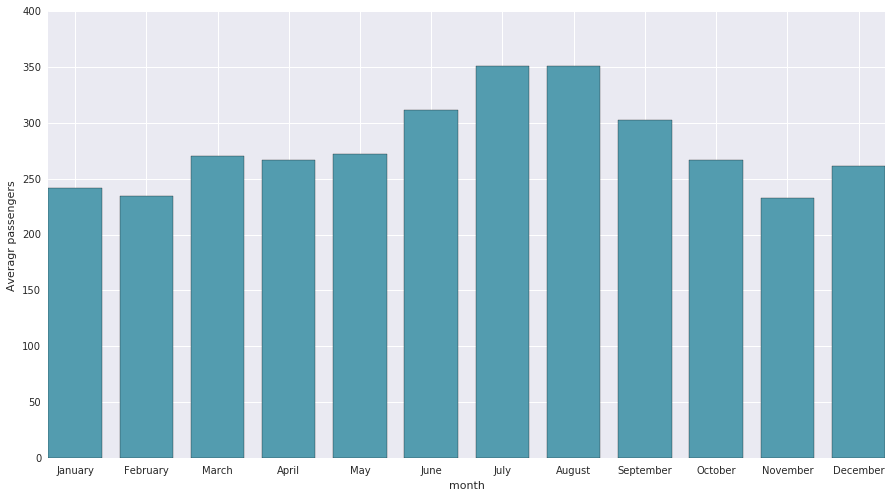

In [4]:
import numpy as np

each_month = data[['month', 'passengers']].groupby('month').mean()
#x_data = each_month.index.values
#月份按顺序排列
x_data = np.arange(1, 13, 1)
y_data = each_month['passengers']

_, ax = plt.subplots(figsize = (15, 8))
ax.set_xlabel("month")
ax.set_ylabel("Averagr passengers")
ax.set_xticks(x_data)
ax.set_xticklabels(each_month.index)
ax.bar(x_data, y_data, color = '#539caf', align = 'center', width = 0.75)

## 练习2：鸢尾花花型尺寸分析
* 萼片（sepal）和花瓣（petal）的大小关系（散点图）
* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
* 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

In [8]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


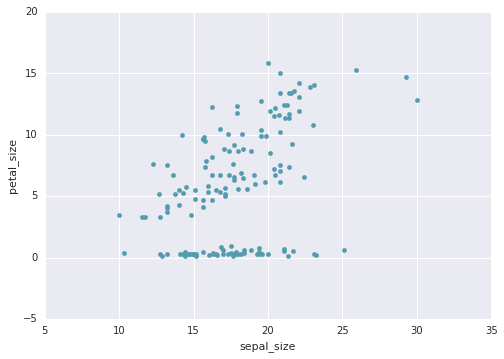

In [9]:
# your code
data["sepal_size"] = data["sepal_length"] * data["sepal_width"]
data["petal_size"] = data["petal_length"] * data["petal_width"]
x_data = data["sepal_size"]
y_data = data["petal_size"]
_, ax = plt.subplots()
ax.set_xlabel("sepal_size")
ax.set_ylabel("petal_size")
ax.scatter(x_data, y_data, color = '#539caf')

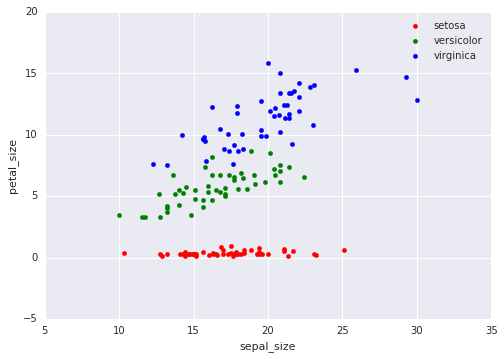

In [10]:
import pandas as pd

pd.unique(data["species"])
setosa_data = data[data.species == "setosa"]
versicolor_data = data[data.species == "versicolor"]
virginica_data = data[data.species == "virginica"]
_, ax = plt.subplots()
ax.set_xlabel("sepal_size")
ax.set_ylabel("petal_size")
ax.scatter(setosa_data["sepal_size"], setosa_data["petal_size"], color = 'r', label = 'setosa')
ax.scatter(versicolor_data["sepal_size"], versicolor_data["petal_size"], color = 'g', label = 'versicolor')
ax.scatter(virginica_data["sepal_size"], virginica_data["petal_size"], color = 'b', label = 'virginica')
ax.legend(loc = "best")

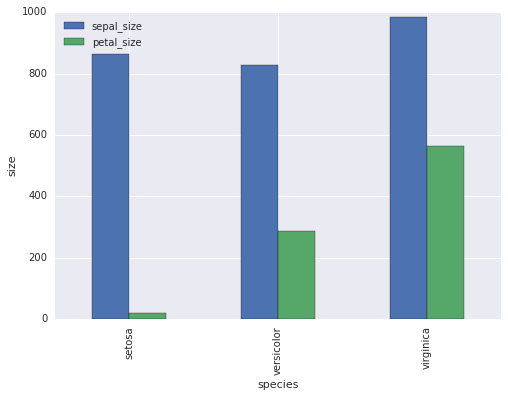

In [14]:
_, x = plt.subplots()
sepal_size = data[["species", "sepal_size", "petal_size"]].groupby("species").sum()
sepal_size.plot(kind = "bar", ax = x)
x.set_xlabel("species")
x.set_ylabel("size")

## 练习3：餐厅小费情况分析
* 小费和总消费之间的关系（散点图）
* 男性顾客和女性顾客，谁更慷慨（分类箱式图）
* 抽烟与否是否会对小费金额产生影响（分类箱式图）
* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
* 就餐人数是否会对慷慨度产生影响（分类箱式图）
* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

In [16]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


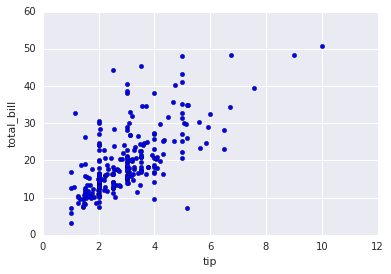

In [17]:
# your code
_, ax = plt.subplots()
ax.scatter(data['tip'],data['total_bill'])
ax.set_xlabel("tip")
ax.set_ylabel("total_bill")

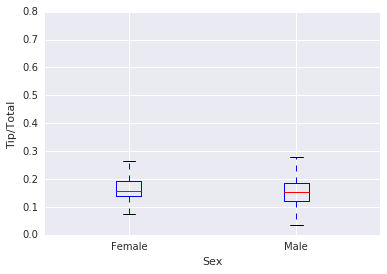

In [18]:
female_gene = data[data.sex == 'Female']
female_gene = female_gene['tip'] / female_gene['total_bill']  # 这里很棒！
male_gene = data[data.sex == 'Male']
male_gene = male_gene['tip'] / male_gene['total_bill']
_, ax = plt.subplots()
ax.boxplot([female_gene, male_gene])
ax.set_xticklabels(['Female', 'Male'])
ax.set_ylabel('Tip/Total')
ax.set_xlabel('Sex')

(0, 10.0)

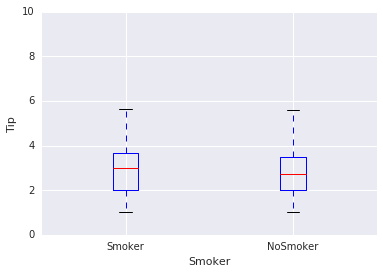

In [19]:
smoker_tip = data[data.smoker == 'Yes']
smoker_tip = smoker_tip['tip']
nosmoker_tip = data[data.smoker == 'No']
nosmoker_tip = nosmoker_tip['tip']
_, ax = plt.subplots()
ax.boxplot([smoker_tip, nosmoker_tip])
ax.set_xticklabels(['Smoker', 'NoSmoker'])
ax.set_ylabel('Tip')
ax.set_xlabel('Smoker')
ax.set_ylim([0, max(max(smoker_tip), max(nosmoker_tip))])

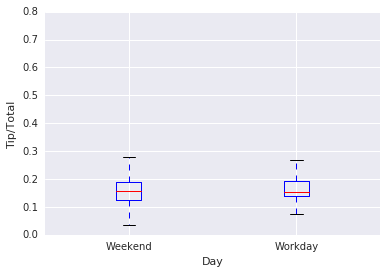

In [20]:
weekend_gene =  data[data.day.isin(['Sun', 'Sat'])]
workday_gene = data[~data.day.isin(['Sun', 'Sat'])]
weekend_gene = weekend_gene['tip'] / weekend_gene['total_bill']
workday_gene = workday_gene['tip'] / workday_gene['total_bill']
_, ax = plt.subplots()
ax.boxplot([weekend_gene, workday_gene])
ax.set_xticklabels(['Weekend', 'Workday'])
ax.set_ylabel('Tip/Total')
ax.set_xlabel('Day')

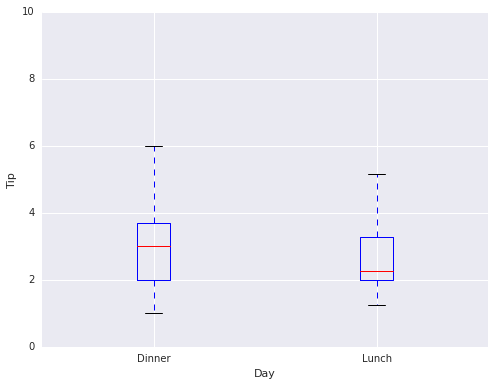

In [21]:
#print pd.unique(data.time)
Dinner_tip = data[data.time == 'Dinner']
Lunch_tip = data[data.time == 'Lunch']
Dinner_tip = Dinner_tip['tip']
Lunch_tip = Lunch_tip['tip']
_, ax = plt.subplots(figsize = (8, 6))
ax.boxplot([Dinner_tip, Lunch_tip])
ax.set_ylim([0, max(max(Dinner_tip), max(Lunch_tip))])
ax.set_xticklabels(['Dinner', 'Lunch'])
ax.set_ylabel('Tip')
ax.set_xlabel('Day')

/opt/ds/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


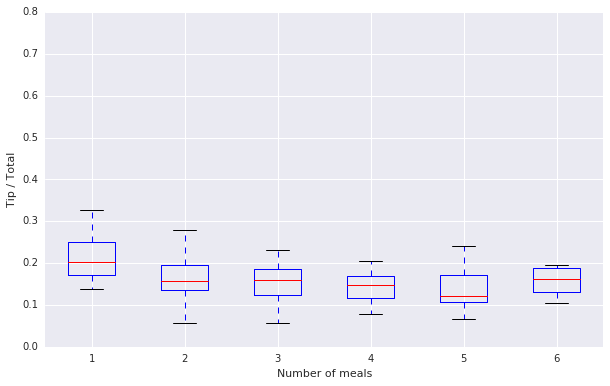

In [22]:
max_size = max(data["size"])
size_data = []
for i in range(1, max_size + 1):
    size_data.append((data[data['size'] == i]['tip'] / data[data['size'] == i]['total_bill']).values)
_, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(size_data)
ax.set_xlabel("Number of meals")
ax.set_ylabel("Tip / Total")
ax.legend()

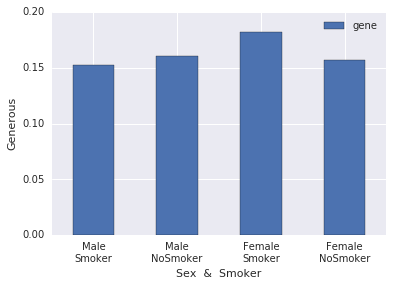

In [23]:
_, x = plt.subplots()
data['gene'] = data['tip'] / data['total_bill']
smoke1sex = data[['sex', 'smoker', 'gene']].groupby(['sex', 'smoker']).mean()
smoke1sex.plot(kind = "bar", ax = x)
#先按原例输出。再添加标签
x.set_xticklabels(['Male\nSmoker', 'Male\nNoSmoker', 'Female\nSmoker', 'Female\nNoSmoker'], rotation = 0)
x.set_ylabel('Generous')
x.set_xlabel('Sex  &  Smoker')
x.legend()

## 练习4：泰坦尼克号海难幸存状况分析
* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
* 不同性别的幸存比例（堆积柱状图）
* 幸存和遇难乘客的票价分布（分类箱式图）
* 幸存和遇难乘客的年龄分布（分类箱式图）
* 不同上船港口的乘客仓位等级分布（分组柱状图）
* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
* 幸存和遇难乘客父母子女的数量分布（分类箱式图）
* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

In [24]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，
# 是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


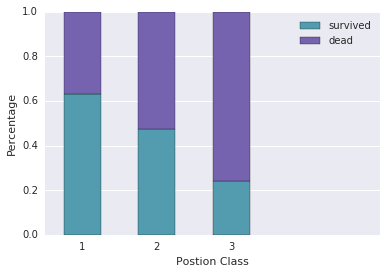

In [25]:
import numpy as np
# your code
#pd.unique(data['pclass'])
tmpdata = data[['pclass', 'survived']].groupby('pclass').agg([np.size, np.sum])
tmpdata.columns = tmpdata.columns.droplevel()
tmpdata['percentage'] = tmpdata['sum'] / tmpdata['size']

_, ax = plt.subplots()
ax.bar(tmpdata.index, tmpdata['percentage'], color = '#539caf', align = 'center', width = 0.5, label = 'survived')
ax.bar(tmpdata.index, 1 - tmpdata['percentage'], color = '#7663b0', bottom = tmpdata['percentage'], width = 0.5, align = 'center', label = 'dead')
ax.set_xticks([1, 2, 3, 5])
ax.set_xticklabels(['1', '2', '3'])
ax.set_ylabel('Percentage')
ax.set_xlabel('Postion Class')
ax.legend(loc = 'best')

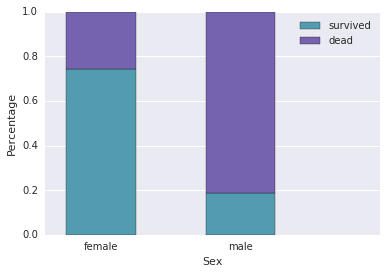

In [26]:
tmpdata = data[['sex', 'survived']].groupby('sex').agg([np.size, np.sum])
tmpdata.columns = tmpdata.columns.droplevel()
tmpdata['percentage'] = tmpdata['sum'] / tmpdata['size']

_, ax = plt.subplots()
x_data = np.arange(1, 3)
ax.bar(x_data, tmpdata['percentage'], color = '#539caf', align = 'center', width = 0.5, label = 'survived')
ax.bar(x_data, 1 - tmpdata['percentage'], color = '#7663b0', bottom = tmpdata['percentage'], width = 0.5, align = 'center', label = 'dead')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(tmpdata.index)
ax.set_ylabel('Percentage')
ax.set_xlabel('Sex')
ax.legend(loc = 'best')

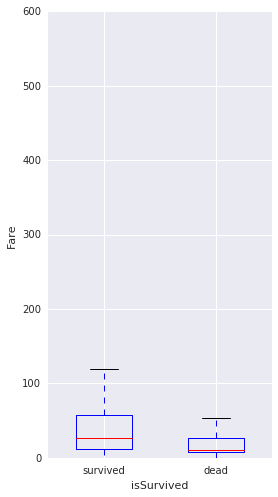

In [27]:
#print data.fare.isnull().value_counts()
survived_data = data[['survived', 'fare']]
survived_data = survived_data[survived_data['survived'] == 1]['fare']
dead_data = data[['survived', 'fare']]
dead_data = dead_data[dead_data['survived'] == 0]['fare']
_, ax = plt.subplots(figsize=(4, 8))
ax.set_xticks([1, 2])
ax.set_ylabel('Fare')
ax.set_xlabel('isSurvived')
ax.boxplot([survived_data, dead_data], widths = 0.5)
ax.set_xticklabels(['survived', 'dead'])

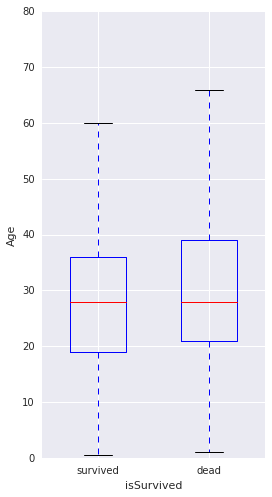

In [28]:
#print data.age.isnull().value_counts()
x_data = range(0, 100, 10)
survived_data = data[['survived', 'age']]
survived_data = survived_data[survived_data['survived'] == 1]['age']
survived_data = survived_data.dropna()
dead_data = data[['survived', 'age']]
dead_data = dead_data[dead_data['survived'] == 0]['age']
dead_data = dead_data.dropna()
_, ax = plt.subplots(figsize=(4, 8))
ax.set_xticks([0, 1])
ax.set_ylabel('Age')
ax.set_xlabel('isSurvived')
ax.boxplot([survived_data, dead_data], widths = 0.5)
ax.set_xticklabels(['survived', 'dead'])

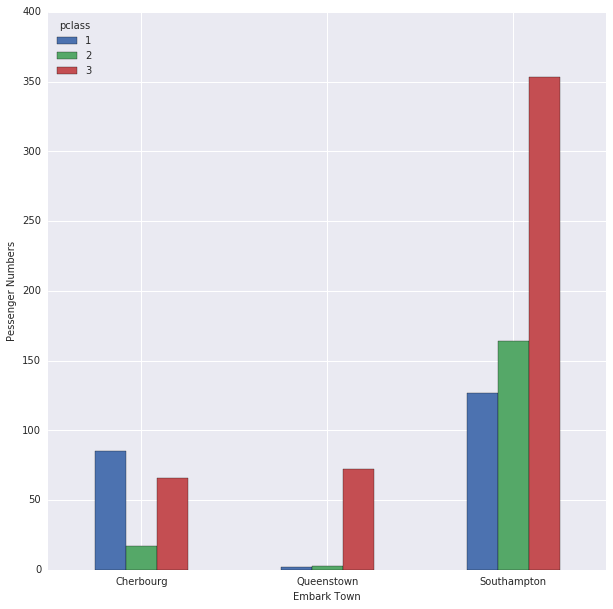

In [29]:
import pandas as pd

embark_list = list(pd.Series(pd.unique(data['embark_town'])).dropna())
embark_data = data[['embark_town', 'pclass']].groupby(['embark_town', 'pclass']).size()
_ , x = plt.subplots()
embark_data.unstack(1).plot(kind = 'bar',figsize=(10, 10), ax = x)
x.set_xticks([0, 1, 2])
x.set_ylabel('Pessenger Numbers', size='medium')
x.set_xlabel('Embark Town', size='medium')
x.set_xticklabels(embark_data.unstack(1).index, rotation = 0 )

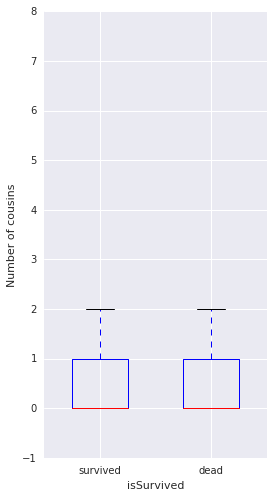

In [30]:
x_data = range(0, 100, 10)
survived_data = data[['survived', 'sibsp']]
survived_data = survived_data[survived_data['survived'] == 1]['sibsp']
survived_data = survived_data.dropna()
dead_data = data[['survived', 'sibsp']]
dead_data = dead_data[dead_data['survived'] == 0]['sibsp']
dead_data = dead_data.dropna()
_, ax = plt.subplots(figsize=(4, 8))
ax.set_ylim([-1, max(max(survived_data), max(dead_data))])
ax.set_xticks([0, 1])
ax.set_ylabel('Number of cousins')
ax.set_xlabel('isSurvived')
ax.boxplot([survived_data, dead_data], widths = 0.5)
ax.set_xticklabels(['survived', 'dead'])

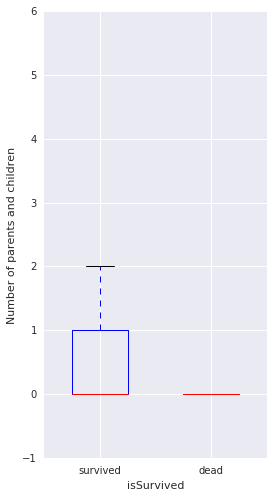

In [12]:
x_data = range(0, 100, 10)
survived_data = data[['survived', 'parch']]
survived_data = survived_data[survived_data['survived'] == 1]['parch']
survived_data = survived_data.dropna()
dead_data = data[['survived', 'parch']]
dead_data = dead_data[dead_data['survived'] == 0]['parch']
dead_data = dead_data.dropna()
_, ax = plt.subplots(figsize=(4, 8))
ax.set_ylim([-1, max(max(survived_data), max(dead_data))])
ax.set_xticks([0, 1])
ax.set_ylabel('Number of parents and children')
ax.set_xlabel('isSurvived')
ax.boxplot([survived_data, dead_data], widths = 0.5)
ax.set_xticklabels(['survived', 'dead'])

alone     False  True 
survived              
0           175    374
1           179    163


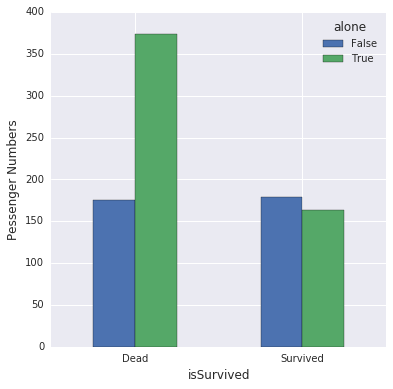

In [13]:
alone_data = data[['survived', 'alone']].groupby(['survived', 'alone']).size()
_ , x = plt.subplots()
alone_data = alone_data.unstack(1)
print alone_data
alone_data.plot(kind = 'bar',figsize=(6, 6), ax = x)
x.set_xticks([0, 1])
x.set_ylabel('Pessenger Numbers', size='medium')
x.set_xlabel('isSurvived', size='medium')
x.set_xticklabels(['Dead', 'Survived'], rotation = 0 )